In [12]:
#Collect and import ten documents
#I tried to segment this off so it was not pulling such a long part of the destination, but I got errors every other way I sliced it.

import pandas as pd
import os
import numpy as np

documents = []
path = 'C:\\Users\Home PC Dell\Desktop\Dr. Salter Design & Development\WeekTwelveTexts\\'

filenames=sorted([os.path.join(path, fn) for fn in os.listdir(path)])
print(len(filenames)) # count files in corpus
print(filenames[:10]) # print names of 1st ten files in corpus


10
['C:\\Users\\Home PC Dell\\Desktop\\Dr. Salter Design & Development\\WeekTwelveTexts\\Dracula.txt', 'C:\\Users\\Home PC Dell\\Desktop\\Dr. Salter Design & Development\\WeekTwelveTexts\\Dunwich.txt', 'C:\\Users\\Home PC Dell\\Desktop\\Dr. Salter Design & Development\\WeekTwelveTexts\\Frank.txt', 'C:\\Users\\Home PC Dell\\Desktop\\Dr. Salter Design & Development\\WeekTwelveTexts\\Hyde.txt', 'C:\\Users\\Home PC Dell\\Desktop\\Dr. Salter Design & Development\\WeekTwelveTexts\\Opera.txt', 'C:\\Users\\Home PC Dell\\Desktop\\Dr. Salter Design & Development\\WeekTwelveTexts\\Paw.txt', 'C:\\Users\\Home PC Dell\\Desktop\\Dr. Salter Design & Development\\WeekTwelveTexts\\Usher.txt', 'C:\\Users\\Home PC Dell\\Desktop\\Dr. Salter Design & Development\\WeekTwelveTexts\\Vampyre.txt', 'C:\\Users\\Home PC Dell\\Desktop\\Dr. Salter Design & Development\\WeekTwelveTexts\\Wendigo.txt', 'C:\\Users\\Home PC Dell\\Desktop\\Dr. Salter Design & Development\\WeekTwelveTexts\\Willows.txt']


In [13]:
import sklearn.feature_extraction.text as text

vectorizer=text.CountVectorizer(input='filename', stop_words="english", min_df=1)
dtm=vectorizer.fit_transform(filenames).toarray() # defines document term matrix

vocab=np.array(vectorizer.get_feature_names())

In [14]:
# Using the topic modeling code as a starter, build a topic model of the documents
print(f'Shape of document-term matrix: {dtm.shape}. '
      f'Number of tokens {dtm.sum()}')

Shape of document-term matrix: (10, 18116). Number of tokens 189791


In [15]:
#Using the topic modeling code as a starter, build a topic model of the documents
import sklearn.decomposition as decomposition
model = decomposition.LatentDirichletAllocation(
    n_components=100, learning_method='online', random_state=1)

In [16]:
#Using the topic modeling code as a starter, build a topic model of the documents
document_topic_distributions = model.fit_transform(dtm)

In [17]:
#Using the topic modeling code as a starter, build a topic model of the documents
vocabulary = vectorizer.get_feature_names()
# (# topics, # vocabulary)
assert model.components_.shape == (100, len(vocabulary))
# (# documents, # topics)
assert document_topic_distributions.shape == (dtm.shape[0], 100)

In [18]:
#Using the topic modeling code as a starter, build a topic model of the documents
topic_names = [f'Topic {k}' for k in range(100)]
topic_word_distributions = pd.DataFrame(
    model.components_, columns=vocabulary, index=topic_names)
print(topic_word_distributions)

                00       000        01        02        03        04  \
Topic 0   0.240440  0.201934  0.195902  0.185536  0.243303  0.191426   
Topic 1   0.224398  0.216225  0.228078  0.215852  0.232036  0.192563   
Topic 2   0.183774  0.203513  0.207648  0.211981  0.182050  0.180348   
Topic 3   0.176281  0.210842  0.206563  0.213356  0.184010  0.190914   
Topic 4   0.180408  0.225164  0.202078  0.222010  0.195744  0.192582   
...            ...       ...       ...       ...       ...       ...   
Topic 95  0.208073  0.211070  0.234611  0.183877  0.205050  0.203618   
Topic 96  0.186383  0.191290  0.249839  0.236537  0.220568  0.233022   
Topic 97  0.210253  0.210102  0.160942  0.209011  0.194179  0.213187   
Topic 98  0.238109  0.194913  0.185927  0.189436  0.238293  0.192360   
Topic 99  0.187463  0.232779  0.203234  0.212698  0.174711  0.190650   

                05        10       100     10000  ...       zip    zipped  \
Topic 0   0.236945  0.169275  0.227390  0.187183  ...  0.2

In [19]:
topic_word_distributions.loc['Topic 4'].sort_values(ascending=False).head(18)

said      1.064172
know      0.873490
did       0.833271
time      0.795720
like      0.782874
little    0.714785
face      0.679809
night     0.669120
way       0.663303
man       0.643553
raoul     0.643282
went      0.634564
shall     0.633149
come      0.621593
room      0.609914
work      0.596527
came      0.571420
great     0.565830
Name: Topic 4, dtype: float64

In [20]:
document_topic_distributions = pd.DataFrame(
    document_topic_distributions, columns=topic_names)
print(document_topic_distributions)

        Topic 0       Topic 1       Topic 2       Topic 3       Topic 4  \
0  1.575473e-07  1.575473e-07  1.575473e-07  1.575473e-07  1.575473e-07   
1  9.844458e-07  9.844458e-07  9.844458e-07  9.844458e-07  9.844458e-07   
2  3.091477e-07  3.091477e-07  3.091477e-07  3.091477e-07  3.091477e-07   
3  8.346549e-07  8.346549e-07  8.346549e-07  8.346549e-07  8.346549e-07   
4  2.728662e-07  2.728662e-07  2.728662e-07  2.728662e-07  2.728662e-07   
5  2.794077e-06  2.794077e-06  2.794077e-06  2.794077e-06  2.794077e-06   
6  2.111486e-06  2.111486e-06  2.111486e-06  2.111486e-06  2.111486e-06   
7  1.429797e-06  1.429797e-06  1.429797e-06  1.429797e-06  1.429797e-06   
8  9.996002e-07  9.996002e-07  9.996002e-07  9.996002e-07  9.996002e-07   
9  1.012043e-06  1.012043e-06  1.012043e-06  1.012043e-06  1.012043e-06   

        Topic 5       Topic 6       Topic 7       Topic 8       Topic 9  ...  \
0  1.575473e-07  1.575473e-07  1.575473e-07  1.575473e-07  1.575473e-07  ...   
1  9.844458e-0

In [21]:
words = topic_word_distributions.loc['Topic 2'].sort_values(ascending=False).head(18)
words

said         0.682773
little       0.572419
time         0.531939
like         0.503375
project      0.475656
man          0.472145
did          0.461939
great        0.460365
night        0.456547
voice        0.454463
christine    0.451667
know         0.448084
room         0.436507
eyes         0.436325
away         0.434964
shall        0.434015
saw          0.431930
went         0.426812
Name: Topic 2, dtype: float64

00       0.183774
000      0.203513
01       0.207648
02       0.211981
03       0.182050
04       0.180348
05       0.166842
10       0.224715
100      0.180893
10000    0.214090
10234    0.209919
10897    0.207395
10_th    0.199105
11       0.197355
11438    0.221522
11th     0.245115
12       0.165196
12122    0.204284
12th     0.248978
13       0.204768
Name: Topic 2, dtype: float64


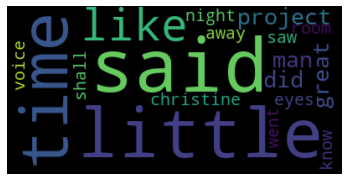

In [24]:
#I got hung up here for quite a while because of a wordcloud import problem. It appears I figured it out.
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()